<a href="https://colab.research.google.com/github/Edwin-svg/Data_Minning_Arima-Sarima/blob/main/SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pandas import read_csv
import pandas as pd
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from math import sqrt
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = read_csv('Bri_saham.csv', header=0, index_col=0, parse_dates=True)
series = df['Close']
df.tail()

,Open,High,Low,Close,Volume,AdjustedClose
Date,,,,,,
2023-07-14,5450.0,5525.0,5425.0,5525.0,127814200,5525.0
2023-07-17,5550.0,5625.0,5525.0,5575.0,166951300,5575.0
2023-07-18,5625.0,5700.0,5600.0,5625.0,141884700,5625.0
2023-07-20,5575.0,5650.0,5550.0,5625.0,111117300,5625.0
2023-07-21,5600.0,5625.0,5575.0,5625.0,63094600,5625.0


In [3]:
df.describe()

,Open,High,Low,Close,Volume,AdjustedClose
count,2420.000000,2420.000000,2420.000000,2420.000000,2.420000e+03,2420.000000
mean,7094.522727,7173.130165,7015.865702,7094.894628,9.569334e+07,3197.048816
std,3807.136625,3845.724521,3779.982111,3814.496538,9.017187e+07,1046.368947
min,2250.000000,2270.000000,2160.000000,2170.000000,1.261460e+06,1239.010000
25%,4017.500000,4070.000000,3967.500000,4020.000000,2.594228e+07,2242.657500
50%,4715.000000,4750.000000,4650.000000,4710.000000,7.697245e+07,3063.380000
75%,10875.000000,10950.000000,10700.000000,10825.000000,1.344169e+08,4146.294000
max,16450.000000,16825.000000,16425.000000,16450.000000,8.726073e+08,5625.000000


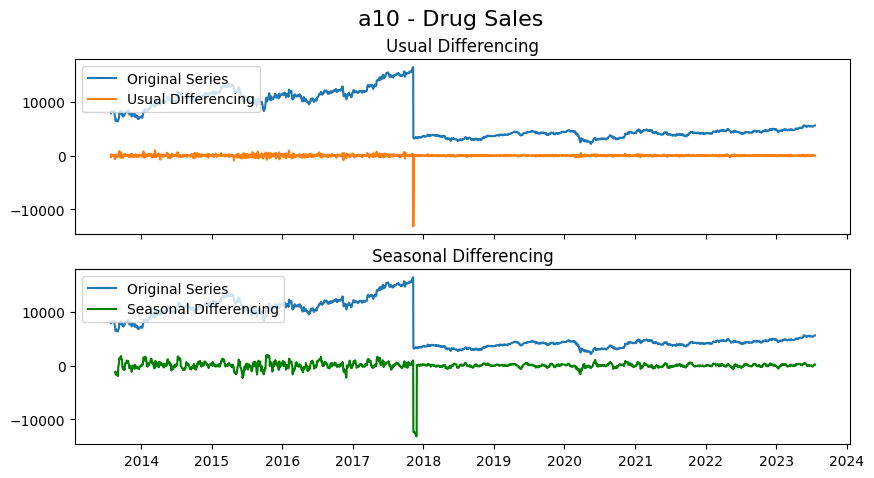

In [4]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(series[:], label='Original Series')
axes[0].plot(series[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(series[:], label='Original Series')
axes[1].plot(series[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('a10 - Drug Sales', fontsize=16)
plt.show()

In [5]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.5 MB/s eta 0:00:00


<Axes: xlabel='Date'>

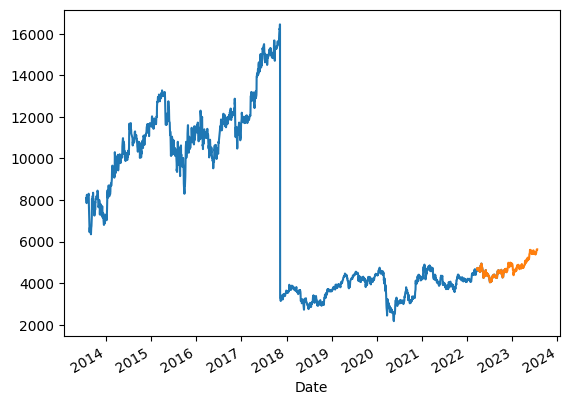

In [6]:
train, test = series[:2246], series[2100:]
n = len(series)
n_train = len(train)
n_test = len(test)

fig, ax = pyplot.subplots()
train.plot(ax=ax)
test.plot(ax=ax)

In [7]:
import pmdarima as pm

def arimamodel(timeseries):
  automodel = pm.auto_arima(timeseries,
                            start_p=0,
                            start_q=2,
                            max_p=3, max_q=3, m=12,
                            start_P=0, seasonal=True,
                            d=None, D=1, trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)
  return automodel

In [8]:
automodel = arimamodel(train)
print(automodel.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=34463.873, Time=16.25 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=37404.215, Time=0.17 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=33010.955, Time=7.88 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=35382.436, Time=9.95 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=37403.032, Time=0.11 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=33673.061, Time=0.97 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=32775.550, Time=31.22 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=49.94 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=10.56 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=37378.533, Time=5.85 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=32770.326, Time=30.45 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=33004.445, Time=13.74 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=63.80 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=28.19 sec
 ARIMA(3,0,0)(2,1,0)[

In [9]:
test.shape

(320,)

In [10]:
predictions_arima = automodel.predict(n_periods=test.shape[0])
predictions_arima

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


2246    4654.875247
2247    4630.388503
2248    4577.157772
2249    4571.435008
2250    4564.790564
           ...     
2561    4518.636282
2562    4510.299916
2563    4527.357109
2564    4586.211490
2565    4577.910442
Length: 320, dtype: float64

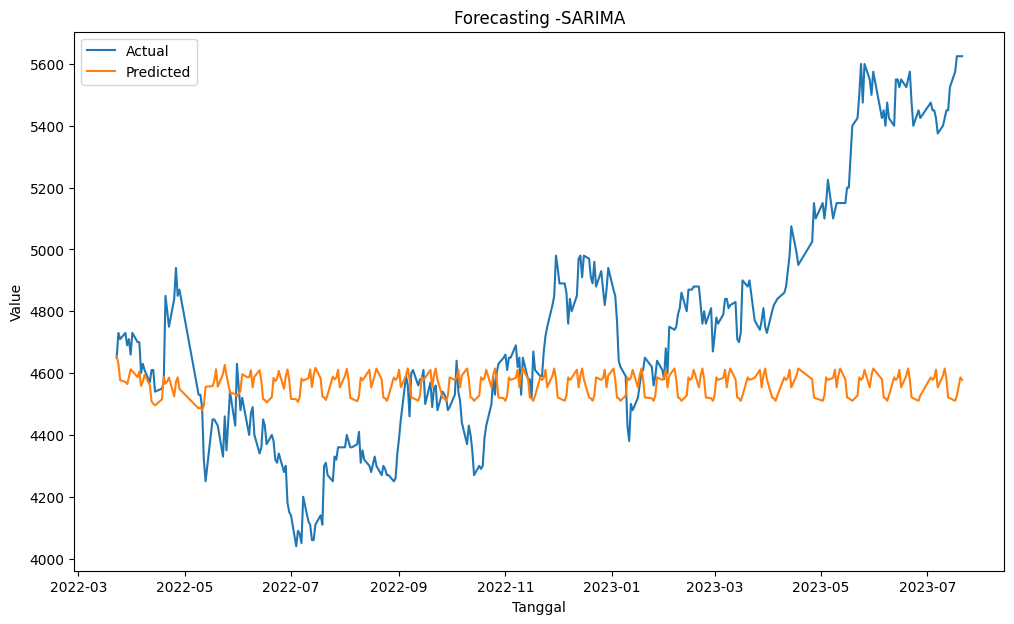

In [11]:
pyplot.figure(figsize=(12,7))
pyplot.plot(test.index, test, label='Actual')
pyplot.plot(test.index, predictions_arima, label='Predicted')
pyplot.title('Forecasting -SARIMA')
pyplot.xlabel('Tanggal')
pyplot.ylabel('Value')
pyplot.legend()

In [12]:
rmse = sqrt(mean_squared_error(test, predictions_arima))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 411.519


<Axes: >

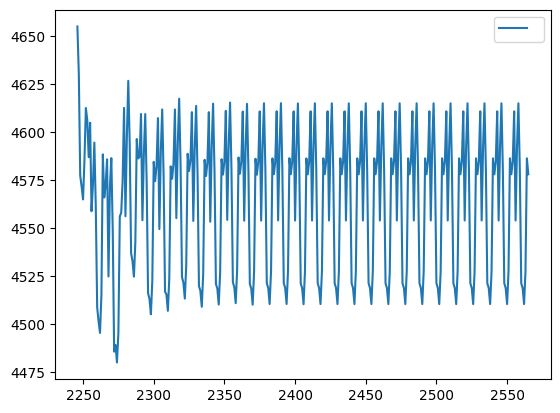

In [13]:
predictions_arima.plot(legend = True)

In [14]:
predictions_arima.describe()

count     320.000000
mean     4564.403355
std        36.510690
min      4479.895626
25%      4524.666024
50%      4577.912164
75%      4588.349745
max      4654.875247
dtype: float64

**COBA 2**

In [15]:
!pip install pmdarima

In [16]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from math import sqrt

import warnings
warnings.filterwarnings("ignore")

In [17]:
df = read_csv('Bri_saham.csv', header=0, index_col=0, parse_dates=True)
series = df['Close']
df.tail()

,Open,High,Low,Close,Volume,AdjustedClose
Date,,,,,,
2023-07-14,5450.0,5525.0,5425.0,5525.0,127814200,5525.0
2023-07-17,5550.0,5625.0,5525.0,5575.0,166951300,5575.0
2023-07-18,5625.0,5700.0,5600.0,5625.0,141884700,5625.0
2023-07-20,5575.0,5650.0,5550.0,5625.0,111117300,5625.0
2023-07-21,5600.0,5625.0,5575.0,5625.0,63094600,5625.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2420 entries, 2013-07-26 to 2023-07-21
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           2420 non-null   float64
 1   High           2420 non-null   float64
 2   Low            2420 non-null   float64
 3   Close          2420 non-null   float64
 4   Volume         2420 non-null   int64  
 5   AdjustedClose  2420 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 132.3 KB


In [19]:
import matplotlib.pyplot as plt
import pandas as pd
#Deklarasi fungsi untuk mengecek stasioneritas data
# Deklarasi fungsi untuk mengecek stasioner data
from statsmodels.tsa.stattools import adfuller
def test_stasionarity(timeseries):
  # Determinate rolling statis
  rolmen = timeseries.rolling(window =12).mean()
  rolstd = timeseries.rolling(window=12).std()

  # Plot rolling statistic :
  orig = plt.plot(timeseries, color='blue', label = 'Original')
  mean = plt.plot(rolmen, color='red', label = 'Rolling Mean')
  std = plt.plot(rolstd, color='black', label= 'Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show()

  #Perform Dickey-Fuller test
  print('Result of Dickey-Fuller Test: ')
  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index = ['Test Statuctic', 'p-value','#Lags Used', 'Number of Observations Used'])
  for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
  print(dfoutput)

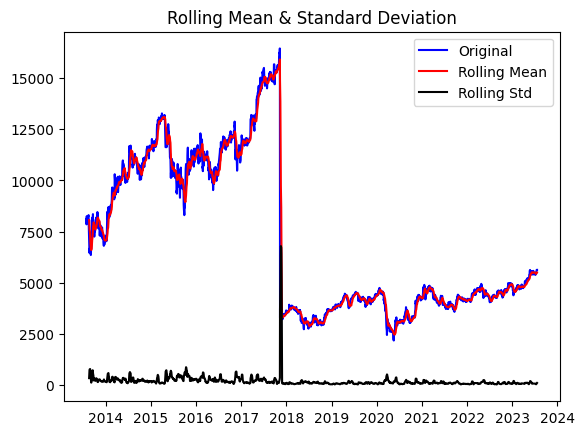

Result of Dickey-Fuller Test: 
Test Statuctic                   -1.966614
p-value                           0.301401
#Lags Used                        0.000000
Number of Observations Used    2419.000000
Critical Value (1%)              -3.433056
Critical Value (5%)              -2.862736
Critical Value (10%)             -2.567406
dtype: float64


In [20]:
#Melakukan uji stasioneritas untuk dataset
test_stasionarity(series)

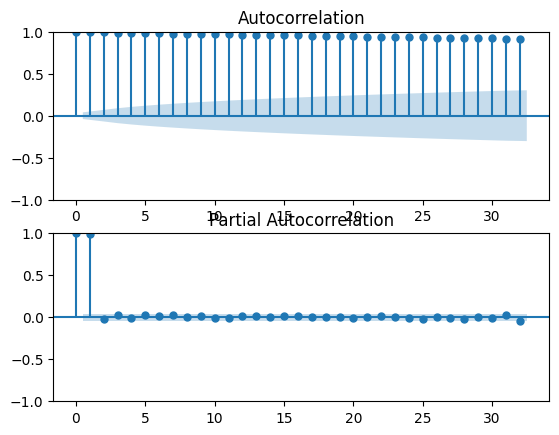

In [21]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure()
plt. subplot (211)
plot_acf(series, ax=plt.gca(), lags=32)
plt.subplot(212)
plot_pacf(series, ax=plt.gca(), lags=32)
plt.show()

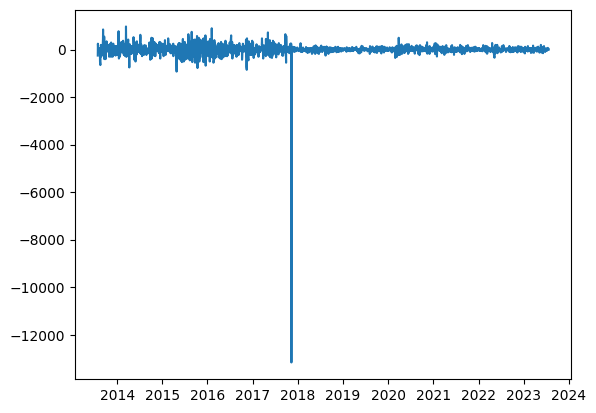

In [22]:
series_diff_1 = series - series.shift()
series_diff_1 = series_diff_1.dropna()
plt.plot(series_diff_1)

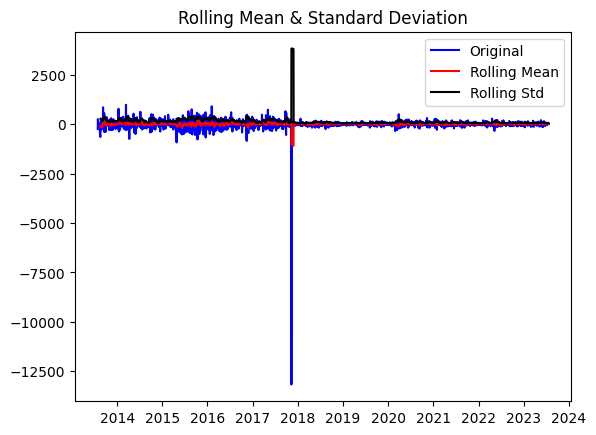

Result of Dickey-Fuller Test: 
Test Statuctic                  -48.392410
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    2418.000000
Critical Value (1%)              -3.433057
Critical Value (5%)              -2.862736
Critical Value (10%)             -2.567407
dtype: float64


In [23]:
test_stasionarity(series_diff_1)

<Axes: xlabel='Date'>

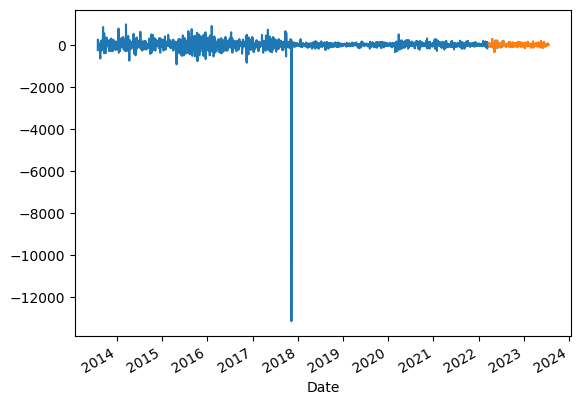

In [24]:
train, test = series_diff_1[:2246], series_diff_1[2100:]
n = len(series_diff_1)
n_train = len(train)
n_test = len(test)

fig, ax = pyplot.subplots()
train.plot(ax=ax)
test.plot(ax=ax)

In [25]:
import pmdarima as pm

def arimamodel(timeseries):
  automodel = pm.auto_arima(timeseries,
                            start_p=0,
                            start_q=2,
                            max_p=3, max_q=3, m=12,
                            start_P=0, seasonal=True,
                            d=None, D=1, trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)
  return automodel

In [26]:
automodel = arimamodel(train)
print(automodel.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=inf, Time=12.95 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=33672.495, Time=0.15 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=32995.010, Time=7.48 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=5.32 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=33670.501, Time=0.11 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=33673.641, Time=0.33 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=32736.777, Time=14.50 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=46.27 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=7.85 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=32735.974, Time=15.03 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=32993.430, Time=4.60 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=39.28 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=5.45 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=32736.728, Time=12.08 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept 

In [27]:
test.shape[0]

319

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 15, 6
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
import warnings
from sklearn.metrics import mean_squared_error
from math import sqrt

In [30]:
model_ARIMA = pm.auto_arima(series, order=(1,0,2)(2,1,0))
forecast = model_ARIMA.predict(n_periods=150)
print(forecast)

TypeError: ignored

In [31]:
predictions_arima = automodel.predict(n_periods=test.shape[0])
predictions_arima

2246   -16.083020
2247   -45.448865
2248     2.063152
2249     0.344202
2250    27.169875
          ...    
2560     4.625076
2561    -1.576690
2562    23.456297
2563    63.927368
2564    -2.536529
Length: 319, dtype: float64

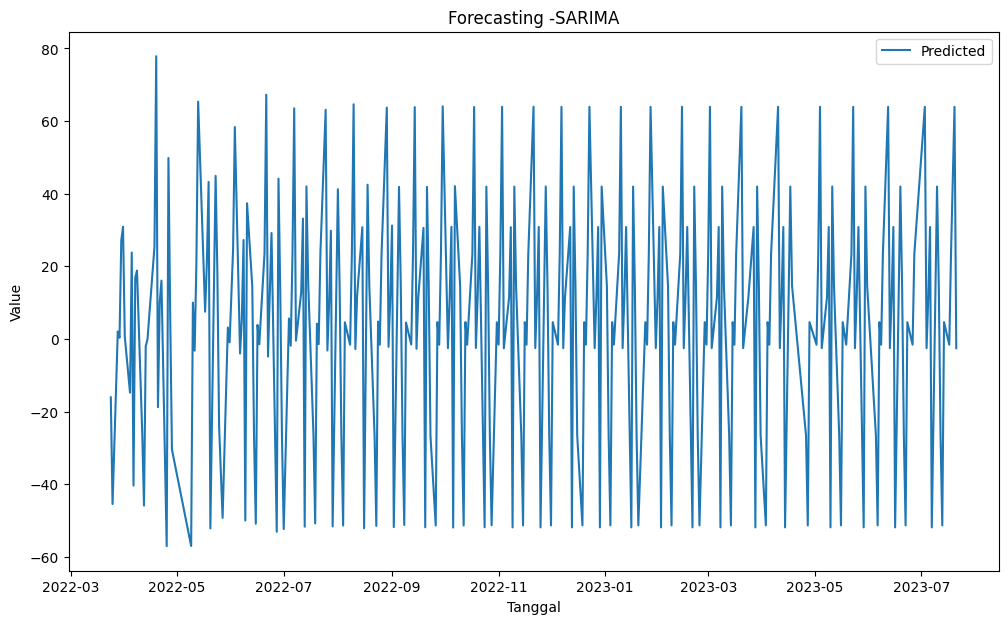

In [32]:
pyplot.figure(figsize=(12,7))
#pyplot.plot(test.index, test, label='Actual')
pyplot.plot(test.index, predictions_arima, label='Predicted')
pyplot.title('Forecasting -SARIMA')
pyplot.xlabel('Tanggal')
pyplot.ylabel('Value')
pyplot.legend()

In [33]:
rmse = sqrt(mean_squared_error(test, predictions_arima))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 78.865


<Axes: >

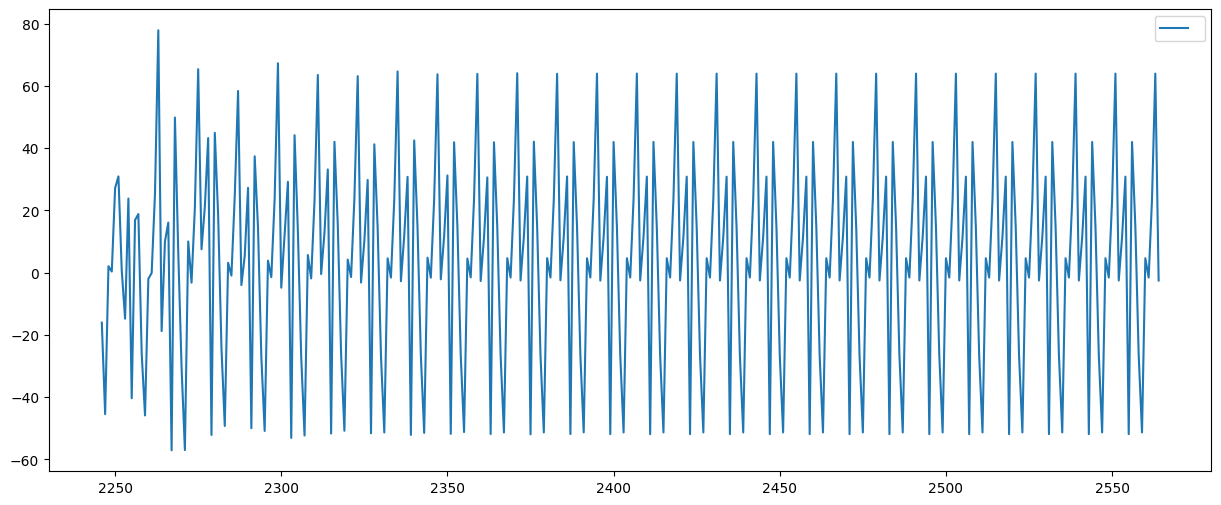

In [34]:
predictions_arima.plot(legend = True)

In [35]:
predict_dif = automodel.predict(start=2500, end = 2650)
predictions_dif_cum_sum = predict_dif.cumsum()
pred_testing = [series[-1]]
for i, j in enumerate(predictions_dif_cum_sum):
  a = pred_testing[i] + j
  pred_testing.append(a)
predict = pd.Series(pred_testing[1:], index=predict_dif.index)
print(predict)

2246    5608.916980
2247    5547.385095
2248    5487.916362
2249    5428.791832
2250    5396.837177
2251    5395.776702
2252    5395.378251
2253    5380.187351
2254    5388.778554
2255    5357.001235
dtype: float64


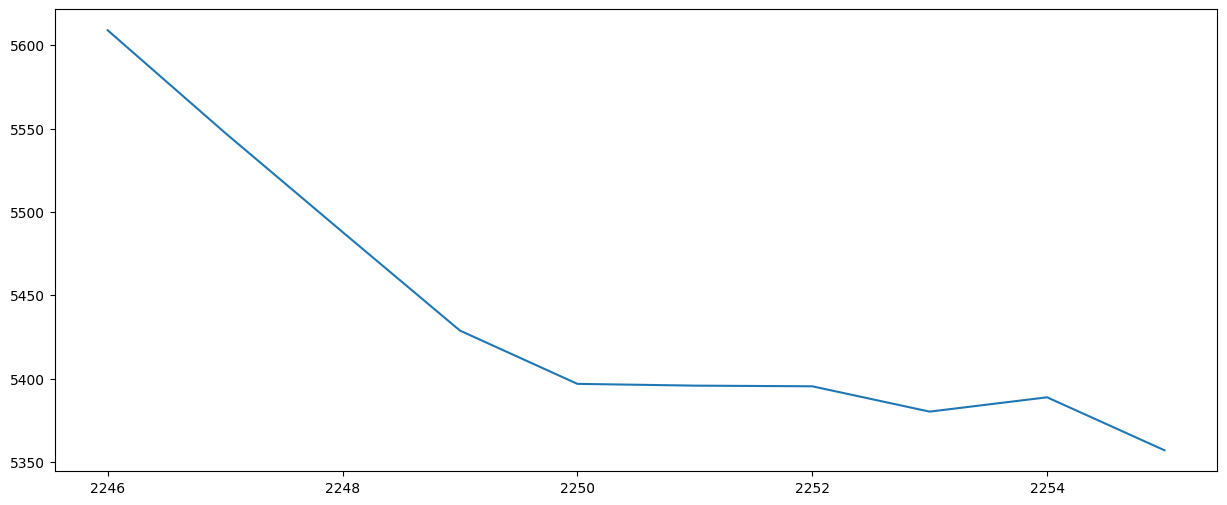

In [36]:
plt.plot(predict)